100%|████████████████████████████████████████████████████████████████████████| 100000/100000 [00:13<00:00, 7405.12it/s]


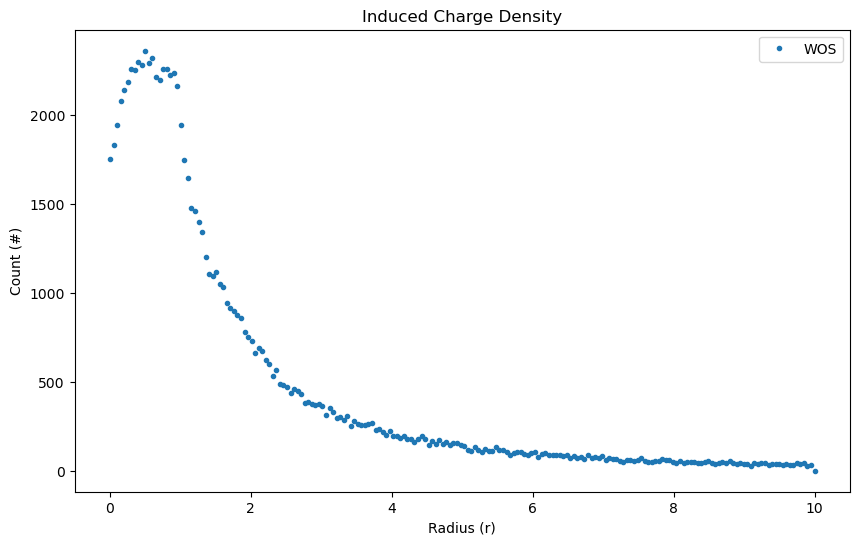

In [56]:
#### WOS ####
############################################################
#### 2024.10.23. ###########################################
#### EunChan Lee ###########################################
#### eunchan_supernova@gm.gist.ac.kr #######################
############################################################

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# 시뮬레이션 파라미터 설정
q = 1.0  # 전하의 크기
d = 1.0  # 전하가 평면으로부터 떨어진 거리
N = 100000  # 반복할 횟수 (Monte Carlo 샘플 수)
bins = 200  # 반경에 따른 bin의 개수
max_radius = 10 * d  # 최대 반경 (0, 0)에서의 거리

# bin에 따른 계수를 저장할 배열 초기화
counts_wos = np.zeros(bins) # count_wos 배열 칸을 bin 개수만큼 만들기
# 반경을 0부터 max_radius까지 bins 개수만큼 일정한 간격으로 설정
radii = np.linspace(0, max_radius, bins)

# N회 시뮬레이션 반복
for _ in tqdm(range(N)):
    # 전하가 위치한 초기 위치 (0, 0, d)
    position = np.array([0, 0, d])
    
    # 점이 평면과의 미소 거리 (epsilon) 안으로 들어올 때까지 이동 반복
    while position[2] > 1e-3:  # 작은 epsilon 값 (1e-5)
        # 구면 좌표계에서 랜덤한 theta와 phi 값 생성
        theta = np.random.uniform(0, np.pi)  # theta는 [0, pi] 범위
        phi = np.random.uniform(0, 2*np.pi)  # phi는 [0, 2*pi] 범위
        r = position[2]  # 평면과의 거리가 반지름
        
        # 구면 좌표계로 새로운 위치 (x, y, z) 계산
        new_x = r * np.sin(theta) * np.cos(phi)
        new_y = r * np.sin(theta) * np.sin(phi)
        new_z = r * np.cos(theta)
        
        # 기존 position을 업데이트 (x, y, z)
        position[:2] += np.array([new_x, new_y])
        position[2] += new_z  # z축 방향 이동
        
    # 전하 투영점 (0, 0)으로부터 평면 상에서의 (x, y) 거리 계산
    distance = np.linalg.norm(position[:2])
    
    # 거리(distance)가 max_radius 이내일 때만 bin에 count 추가
    if distance <= max_radius:
        # np.searchsorted 사용하여 bin 찾기
        idx = np.searchsorted(radii, distance) - 1
        if 0 <= idx < bins:  # 범위 내에 있는 bin만 count 증가
            counts_wos[idx] += 1

# Walk on Sphere 결과 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(radii, counts_wos, '.', label="WOS")

plt.xlabel('Radius (r)')
plt.ylabel('Count (#)')
plt.title('Induced Charge Density')
plt.legend()
plt.show()


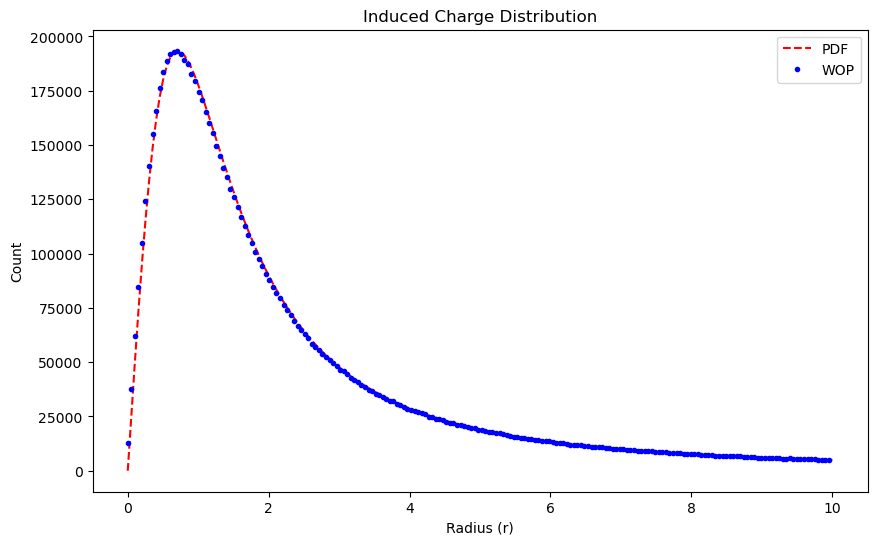

In [48]:
##### WOP #####
############################################################
#### 2024.10.23. ###########################################
#### EunChan Lee ###########################################
#### eunchan_supernova@gm.gist.ac.kr #######################
############################################################

import numpy as np
import matplotlib.pyplot as plt

# 파라미터 설정
q = 1.0  # 전하 크기
d = 1.0  # 전하와 평면의 거리
N = 10000000  # ITM 샘플 수
bins = 200  # bin의 개수
max_radius = 10 * d  # 최대 반경
radii = np.linspace(0, max_radius, bins)  # 반경 r의 범위 설정

# PDF 함수 정의 (유도 전하 밀도 분포)
pdf = (q / d) * (radii / (radii**2 + d**2)**(3/2))  # 반경 r에 따른 PDF 함수 값

# CDF 역함수 정의 및 WOP 샘플 생성
# CDF 함수 F(r) = q * (1 - d / sqrt(r^2 + d^2))
# CDF inverse 함수 r = d*sqrt(1 / (1 - F / q)**2 - 1)
r_wop = d*np.sqrt(1/ (1 - np.random.rand(N)/q)**2 - 1)  # WOP 방법으로 반경 샘플 생성

# WOP 결과를 histogram 함수를 이용해서 저장하기
wop_counts, _ = np.histogram(r_wop, bins=radii, range=(0, max_radius))  # r의 bin 경계 설정

# PDF를 WOP 결과에 맞춰 스케일링
scaling_factor = np.max(wop_counts) / np.max(pdf)  # WOP 최대값에 PDF 맞추기 위한 스케일링 인자
pdf_scaled = pdf * scaling_factor  # 스케일링된 PDF

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(radii, pdf_scaled, 'r--', label="PDF")  # PDF plot
plt.plot(radii[:-1], wop_counts, '.', color='b', label="WOP")  # WOP plot

# 그래프 설정
plt.xlabel("Radius (r)")
plt.ylabel("Count")
plt.title("Induced Charge Distribution")
plt.legend()
plt.show()


100%|████████████████████████████████████████████████████████████████████████| 100000/100000 [00:55<00:00, 1812.50it/s]


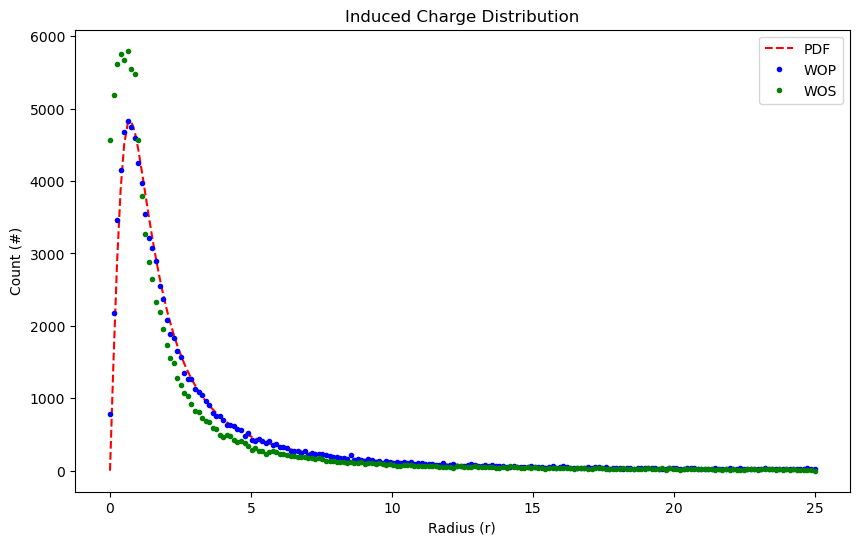

In [4]:
############################################################
#### 2024.09.30. ###########################################
#### EunChan Lee ###########################################
#### eunchan_supernova@gm.gist.ac.kr #######################
#### Charge Distribution Function ##########################
############################################################

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# 시뮬레이션 파라미터 설정
q = 1.0  # 전하의 크기
d = 1.0  # 전하가 평면으로부터 떨어진 거리
N = 10000  # Monte Carlo 샘플 수
bins = 200  # 반경에 따른 bin의 개수
max_radius = 25 * d  # 최대 반경 (0, 0)에서의 거리
radii = np.linspace(0, max_radius, bins)  # 반경 r의 범위 설정

# PDF 함수 정의 (유도 전하 밀도 분포)
pdf = (q / d) * (radii / (radii**2 + d**2)**(3/2))  # 반경 r에 따른 PDF 함수 값: radii 배열에 대응하는 새로운 배열

# WOP 계산
# CDF 역함수 정의 및 WOP 샘플 생성
# CDF 함수 F(r) = q * (1 - d / sqrt(r^2 + d^2))
# CDF inverse 함수 r = d*sqrt(1 / (1 - F / q)**2 - 1)
r_wop = d * np.sqrt((1 / (1 - np.random.rand(N) * q))**2 - 1)  # WOP 방법으로 샘플 생성하면
counts_wop, _ = np.histogram(r_wop, bins=bins, range=(0, max_radius))  # count_wop에 값 쌓기.

# Walk on Sphere (WOS) 결과 계산
counts_wos = np.zeros(bins)
for _ in tqdm(range(N)):
    # 전하가 위치한 초기 위치 (0, 0, d)
    position = np.array([0, 0, d])
    
    # 점이 평면과의 미소 거리 (epsilon) 안으로 들어올 때까지 이동 반복
    while position[2] > 1e-10:  # 작은 epsilon 값 (1e-10)
        
        # 구면 좌표계에서 랜덤한 theta와 phi 값 생성
        theta = np.random.uniform(0, np.pi)
        phi = np.random.uniform(0, 2 * np.pi)
        r = position[2]
        
        # 구면 좌표계로 새로운 위치 (x, y, z) 계산
        new_x = r * np.sin(theta) * np.cos(phi)
        new_y = r * np.sin(theta) * np.sin(phi)
        new_z = r * np.cos(theta)
        
        # 기존 position을 업데이트 (x, y, z)
        position[:2] += np.array([new_x, new_y])
        position[2] += new_z  # z축 방향 이동
        
    # 전하 투영점 (0, 0)으로부터 평면 상에서의 (x, y) 거리 계산
    distance = np.linalg.norm(position[:2])
    
    # 거리(distance)가 max_radius 이내일 때만 bin에 count 추가
    if distance <= max_radius:
        # np.searchsorted 사용하여 bin 찾기
        idx = np.searchsorted(radii, distance) - 1
        if 0 <= idx < bins:  # 범위 내에 있는 bin만 count 증가
            counts_wos[idx] += 1

# PDF를 WOP에 맞춰 스케일링
scaling_factor = np.max(counts_wop) / np.max(pdf)
pdf_scaled = pdf * scaling_factor

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(radii, pdf_scaled, 'r--', label="PDF")  # PDF plot (스케일링 : WOP 기준)
plt.plot(radii[:], counts_wop, '.', color='b', label="WOP")  # WOP plot
plt.plot(radii[:], counts_wos, '.', color='g', label="WOS")  # WOS plot

plt.xlabel("Radius (r)")
plt.ylabel("Count (#)")
plt.title("Induced Charge Distribution")
plt.legend()

# 이미지 파일로 저장 (경로 지정 가능)
plt.savefig(r"C:\Supernova\#4_GIST\SeJunior\2nd Semester\과학계산 프로그래밍\Hw_SC\HW_WOS_WOP_006.jpg", format='jpg', dpi=300)

plt.show()

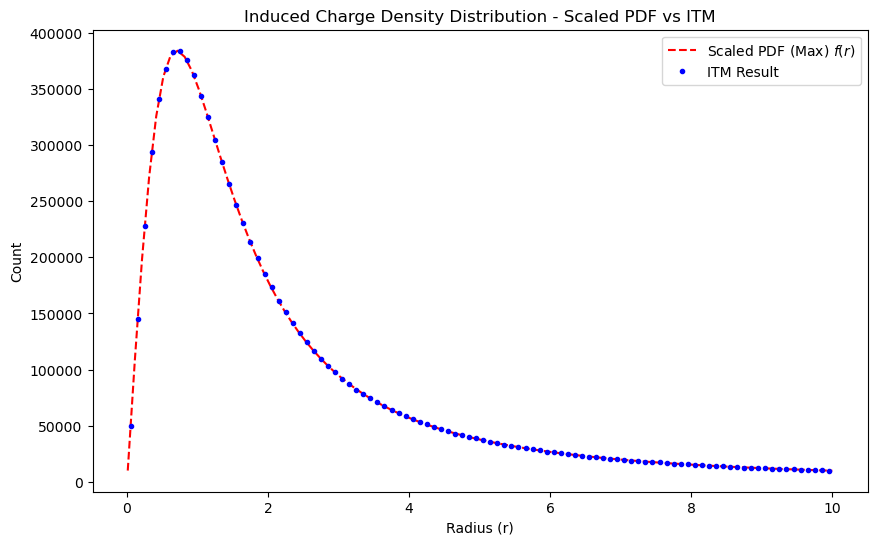


 94%|████████████████████████████████████████████████████████████████████▌    | 94006/100000 [00:13<00:00, 7409.87it/s]


100%|████████████████████████████████████████████████████████████████████████| 100000/100000 [00:14<00:00, 6945.29it/s]


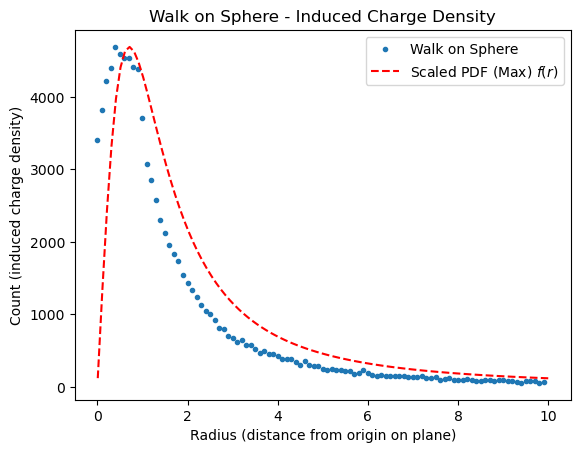